In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
MARIO_SACUDO_RGB = np.array(Image.open("mario_sacudo.png"))[:, :, :3]

In [3]:
def convert_to_grayscale(rgb_image: np.ndarray) -> np.ndarray:
    # Carregar a imagem
    l, c, _ = rgb_image.shape
    
    # Criar matriz para armazenar a versão em cinza
    grayscale_image = np.zeros((l, c), dtype=np.uint8)
    
    # Converter para escala de cinza
    for i in range(l):
        for j in range(c):
            r, g, b = map(float, rgb_image[i, j])
            grayscale_image[i, j] = int((r + g + b) / 3)
    
    return grayscale_image

In [8]:
def conv(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    """
    Aplica um filtro de convolução em uma imagem em escala de cinza.
    
    :param image: Matriz NumPy representando a imagem de entrada.
    :param kernel: Matriz NumPy representando o filtro de convolução.
    :return: Matriz NumPy representando a imagem filtrada.
    """

    m, n = kernel.shape
    assert m == n, "Kernel deve ser uma matriz quadrada."
    l, c = image.shape
    
    # Novas dimensões da imagem (imagem menos o tamanho do filtro):
    new_l = l - m + 1
    new_c = c - n + 1
    new_image = np.zeros(shape=(new_l, new_c))

    for i in range(new_l):
        for j in range(new_c):
            # Soma da multiplicação ponto-a-ponto entre o kernel e a
            # Imagem (recorte do trecho da imagem do mesmo tamanho do kernel):
            new_image[i, j] = np.sum(image[i:i + n, j:j + m] * kernel)
    
    return new_image

In [9]:
def roberts_cross(image: np.ndarray) -> np.ndarray:
    """
    Aplica o operador de Roberts Cross para detecção de bordas.
    
    :param image: Matriz NumPy representando a imagem em escala de cinza.
    :return: Matriz NumPy representando a magnitude do gradiente.
    """
    
    kernel_x = np.array([[1, 0], [ 0, -1]], dtype=np.float64)
    kernel_y = np.array([[0, 1], [-1,  0]], dtype=np.float64)
    
    conv_x = conv(image, kernel_x)
    conv_y = conv(image, kernel_y)
    
    # np.hypot(x, y) é o mesmo que np.sqrt((x ** 2) + (y ** 2))
    gradient = np.hypot(conv_x, conv_y)
    
    return gradient

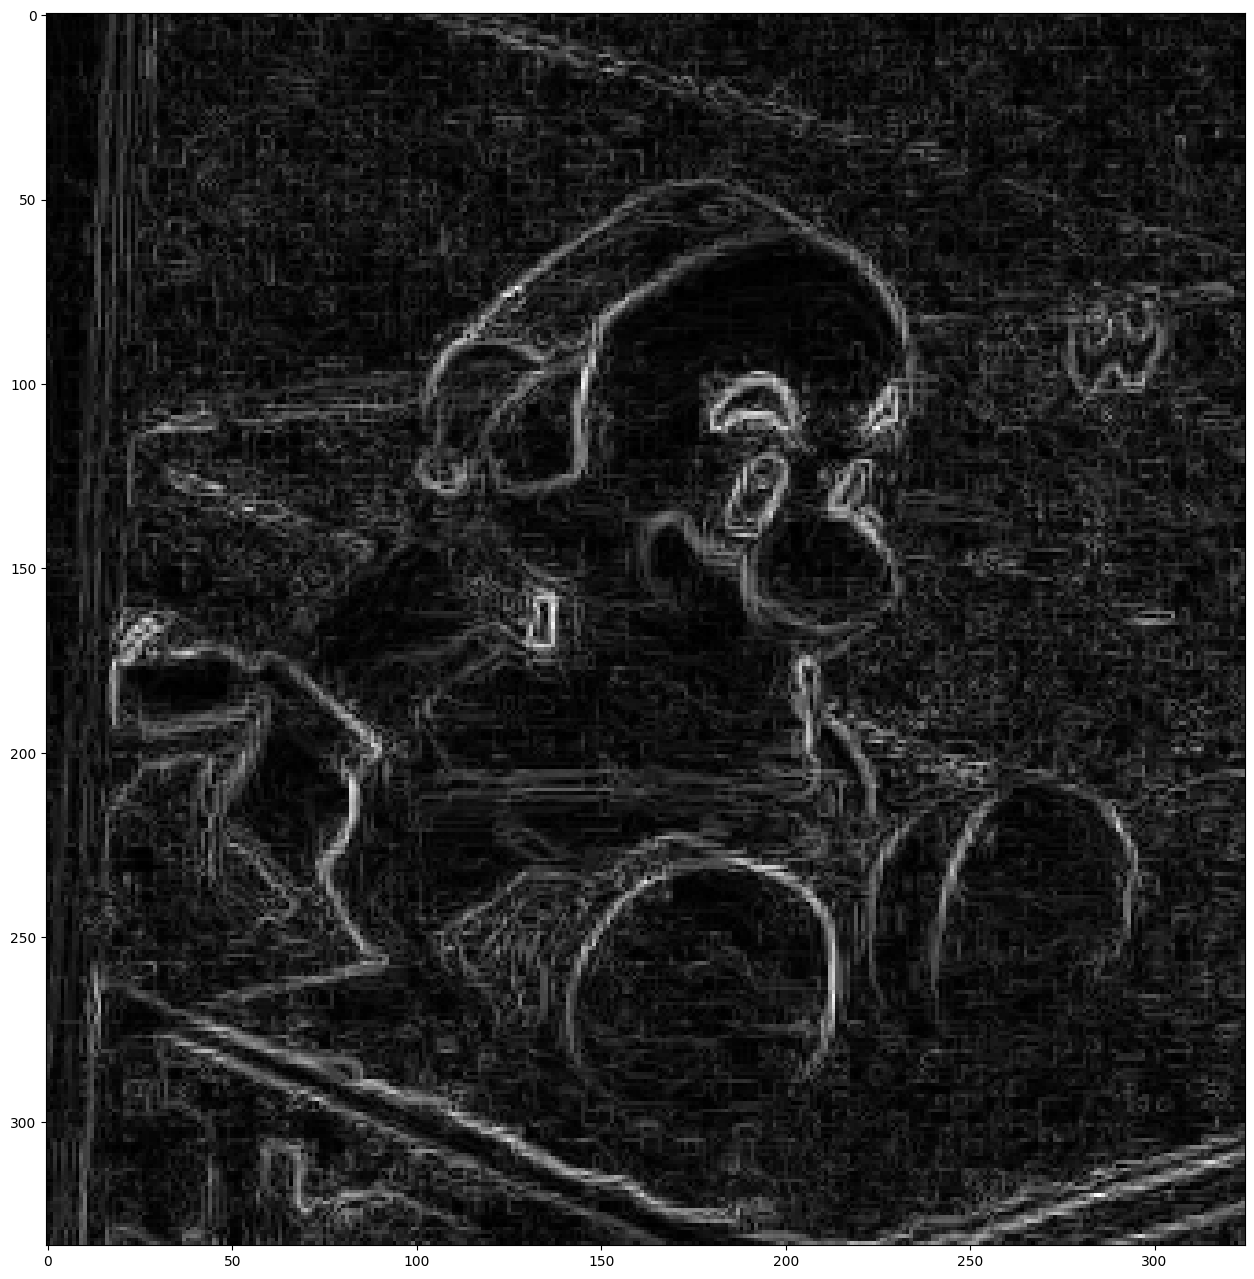

In [11]:
if __name__ == "__main__":
  mario_grayscale = convert_to_grayscale(MARIO_SACUDO_RGB);
  plt.figure(figsize=(16, 16))
  plt.imshow(roberts_cross(mario_grayscale / 255), cmap='gray')
  #plt.show()